In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn.gaussian_process
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel, RationalQuadratic, DotProduct
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold

In [2]:
# https://stackoverflow.com/questions/62376164/how-to-change-max-iter-in-optimize-function-used-by-sklearn-gaussian-process-reg
# Change the maximum number of iterations
class MyGPR(GaussianProcessRegressor):
    def __init__(self, *args, max_iter=15000, **kwargs):
        super().__init__(*args, **kwargs)
        self._max_iter = max_iter

    def _constrained_optimization(self, obj_func, initial_theta, bounds):
        def new_optimizer(obj_func, initial_theta, bounds):
            opt_res = scipy.optimize.minimize(
                obj_func,
                initial_theta,
                method="L-BFGS-B",
                jac=True,
                bounds=bounds,
                options={'maxiter':self._max_iter}
            )
            return opt_res.x, opt_res.fun
        self.optimizer = new_optimizer
        return super()._constrained_optimization(obj_func, initial_theta, bounds)

In [3]:
# sample data set
x=np.array([1,5,8,11,12,13,14,15,16,17,18,19,20])
y=np.array([-15,8,7,-1,1,-3,-2,-2,-2,3,5,4,1])

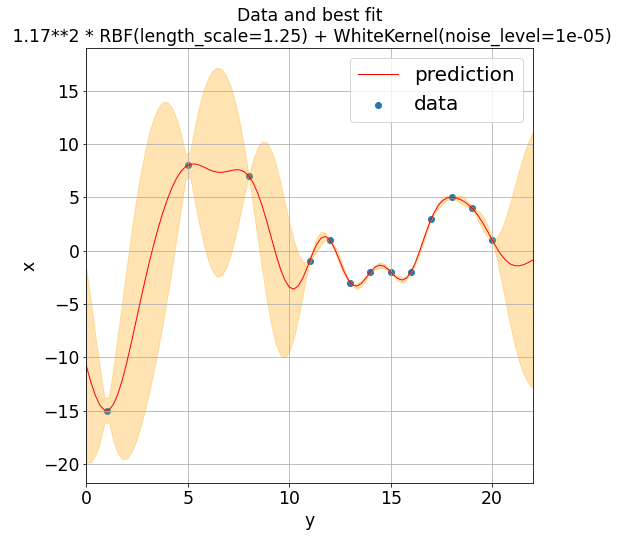

In [4]:
# Fit for optimal hyper-parameters

gp_kernel = ConstantKernel(1, constant_value_bounds=(1e-3,1e3))*RBF(length_scale=1, length_scale_bounds=(1e-3,1e3))+WhiteKernel(noise_level=1e-5, noise_level_bounds=[1e-5,1e2])

gpr = MyGPR(kernel=gp_kernel, n_restarts_optimizer=5, normalize_y=1)
gpr.fit(x.reshape(-1,1),y);
x_plot=np.linspace(0,22,100)
y_pre, y_std = gpr.predict(x_plot.reshape(-1,1), return_std=True)

fig, a0 = plt.subplots(1, 1, figsize=(8, 8))
fig.patch.set_facecolor('white')
a0.grid()
a0.set_xlim(left=0, right=22)
a0.set_title('Data and best fit\n %s'%gpr.kernel_, size = "xx-large")
a0.set_xlabel(r'y',size='xx-large')
a0.set_ylabel(r'x',size='xx-large')
a0.scatter(x, y, label = 'data', marker = 'o')
a0.plot(x_plot, y_pre, label='prediction', color='red', lw=1)
a0.fill_between(x_plot, y_pre.reshape(1,-1)[0]-2*y_std, y_pre.reshape(1,-1)[0]+2*y_std, alpha=0.3, color='orange')
a0.tick_params(labelsize='xx-large')

a0.legend(prop={'size': 20})

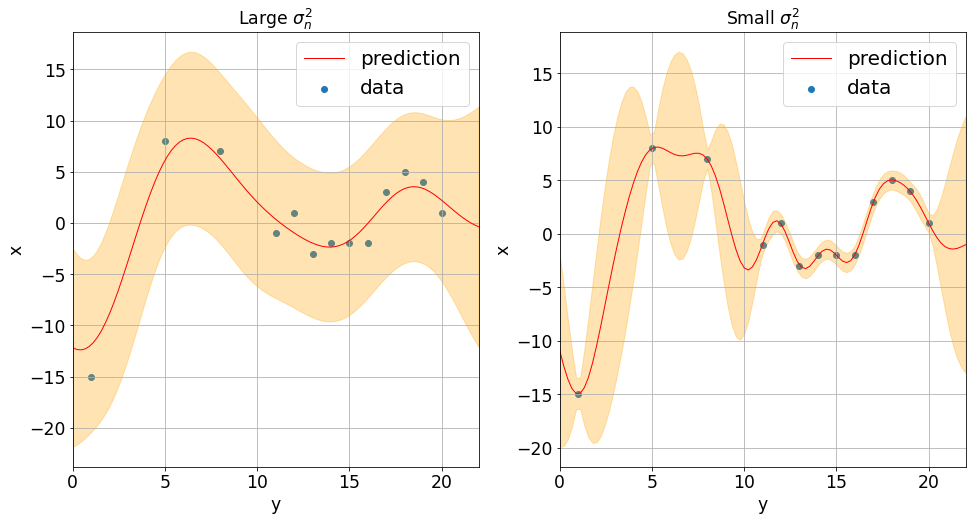

In [5]:
fig, (a0,a1) = plt.subplots(1, 2, figsize=(16, 8))
fig.patch.set_facecolor('white')
a0.grid()
a0.set_xlim(left=0, right=22)
a0.set_title(r'Large $\sigma_n^2$', size = "xx-large")
a0.set_xlabel(r'y',size='xx-large')
a0.set_ylabel(r'x',size='xx-large')
a0.scatter(x, y, label = 'data', marker = 'o')
gp_kernel = ConstantKernel(1, constant_value_bounds=(1e-3,1e3))*RBF(length_scale=1, length_scale_bounds=(1e-3,1e3))+WhiteKernel(noise_level=10, noise_level_bounds='fixed')

gpr = MyGPR(kernel=gp_kernel, n_restarts_optimizer=5, normalize_y=0)
gpr.fit(x.reshape(-1,1),y);

x_plot=np.linspace(0,22,100)
y_pre, y_std = gpr.predict(x_plot.reshape(-1,1), return_std=True)
a0.plot(x_plot, y_pre, label='prediction', color='red', lw=1)
a0.fill_between(x_plot, y_pre.reshape(1,-1)[0]-2*y_std, y_pre.reshape(1,-1)[0]+2*y_std, alpha=0.3, color='orange')
a0.tick_params(labelsize='xx-large')
a0.legend(prop={'size': 20})


a1.grid()
a1.set_xlim(left=0, right=22)
a1.set_title(r'Small $\sigma_n^2$', size = "xx-large")
a1.set_xlabel(r'y',size='xx-large')
a1.set_ylabel(r'x',size='xx-large')
a1.scatter(x, y, label = 'data', marker = 'o')

gp_kernel = ConstantKernel(1, constant_value_bounds=(1e-3,1e3))*RBF(length_scale=1, length_scale_bounds=(1e-3,1e3))+WhiteKernel(noise_level=0.1, noise_level_bounds='fixed')
gpr = MyGPR(kernel=gp_kernel, n_restarts_optimizer=5, normalize_y=0)
gpr.fit(x.reshape(-1,1),y);

x_plot=np.linspace(0,22,100)
y_pre, y_std = gpr.predict(x_plot.reshape(-1,1), return_std=True)
#y_pre+=original_mean
a1.plot(x_plot, y_pre, label='prediction', color='red', lw=1)
a1.fill_between(x_plot, y_pre.reshape(1,-1)[0]-2*y_std, y_pre.reshape(1,-1)[0]+2*y_std, alpha=0.3, color='orange')
a1.tick_params(labelsize='xx-large')

a1.legend(prop={'size': 20})


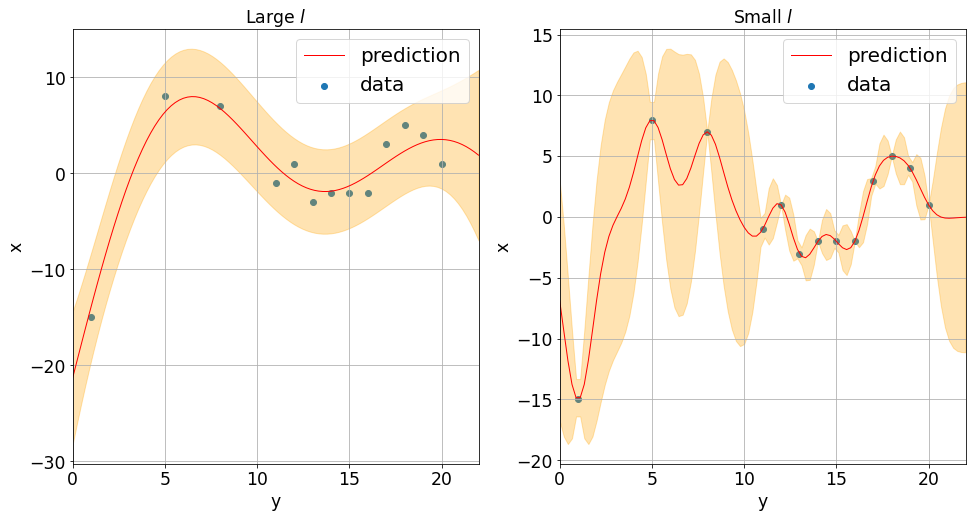

In [6]:
fig, (a0,a1) = plt.subplots(1, 2, figsize=(16, 8))
fig.patch.set_facecolor('white')
a0.grid()
a0.set_xlim(left=0, right=22)
a0.set_title(r'Large $l$', size = "xx-large")
a0.set_xlabel(r'y',size='xx-large')
a0.set_ylabel(r'x',size='xx-large')
a0.scatter(x, y, label = 'data', marker = 'o')
gp_kernel = ConstantKernel(1, constant_value_bounds=(1e-3,1e3))*RBF(length_scale=8, length_scale_bounds='fixed')+WhiteKernel(noise_level=10, noise_level_bounds=[1e-5,1e2])

gpr = MyGPR(kernel=gp_kernel, n_restarts_optimizer=5, normalize_y=0)
gpr.fit(x.reshape(-1,1),y);

x_plot=np.linspace(0,22,100)
y_pre, y_std = gpr.predict(x_plot.reshape(-1,1), return_std=True)
a0.plot(x_plot, y_pre, label='prediction', color='red', lw=1)
a0.fill_between(x_plot, y_pre.reshape(1,-1)[0]-2*y_std, y_pre.reshape(1,-1)[0]+2*y_std, alpha=0.3, color='orange')
a0.tick_params(labelsize='xx-large')
a0.legend(prop={'size': 20})

a1.grid()
a1.set_xlim(left=0, right=22)
a1.set_title(r'Small $l$', size = "xx-large")
a1.set_xlabel(r'y',size='xx-large')
a1.set_ylabel(r'x',size='xx-large')
a1.scatter(x, y, label = 'data', marker = 'o')

gp_kernel = ConstantKernel(1, constant_value_bounds=(1e-3,1e3))*RBF(length_scale=0.8, length_scale_bounds='fixed')+WhiteKernel(noise_level=1, noise_level_bounds=[1e-5,1e2])
gpr = MyGPR(kernel=gp_kernel, n_restarts_optimizer=5, normalize_y=0)
gpr.fit(x.reshape(-1,1),y);

x_plot=np.linspace(0,22,100)
y_pre, y_std = gpr.predict(x_plot.reshape(-1,1), return_std=True)
a1.plot(x_plot, y_pre, label='prediction', color='red', lw=1)
a1.fill_between(x_plot, y_pre.reshape(1,-1)[0]-2*y_std, y_pre.reshape(1,-1)[0]+2*y_std, alpha=0.3, color='orange')
a1.tick_params(labelsize='xx-large')
a1.legend(prop={'size': 20})

0.224**2 * RBF(length_scale=1.45) + WhiteKernel(noise_level=0.1)


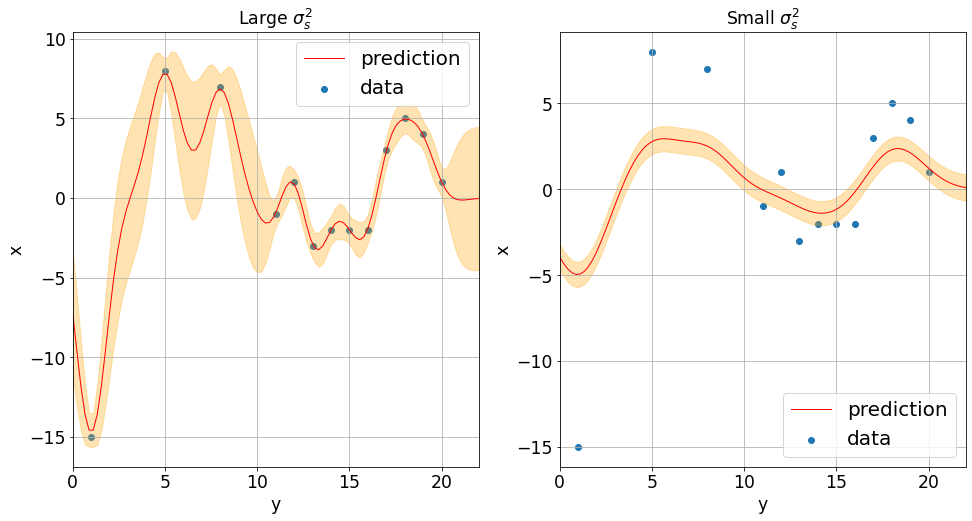

In [7]:
fig, (a0,a1) = plt.subplots(1, 2, figsize=(16, 8))
fig.patch.set_facecolor('white')
a0.grid()
a0.set_xlim(left=0, right=22)
a0.set_title(r'Large $\sigma_s^2$', size = "xx-large")
a0.set_xlabel(r'y',size='xx-large')
a0.set_ylabel(r'x',size='xx-large')
a0.scatter(x, y, label = 'data', marker = 'o')
gp_kernel = ConstantKernel(5, constant_value_bounds='fixed')*RBF(length_scale=1, length_scale_bounds=[1e-2,1e2])+WhiteKernel(noise_level=0.1, noise_level_bounds='fixed')

gpr = MyGPR(kernel=gp_kernel, n_restarts_optimizer=5, normalize_y=0)
gpr.fit(x.reshape(-1,1),y);

x_plot=np.linspace(0,22,100)
y_pre, y_std = gpr.predict(x_plot.reshape(-1,1), return_std=True)
#y_pre+=original_mean
a0.plot(x_plot, y_pre, label='prediction', color='red', lw=1)
a0.fill_between(x_plot, y_pre.reshape(1,-1)[0]-2*y_std, y_pre.reshape(1,-1)[0]+2*y_std, alpha=0.3, color='orange')
a0.tick_params(labelsize='xx-large')
a0.legend(prop={'size': 20})

a1.grid()
a1.set_xlim(left=0, right=22)
a1.set_title(r'Small $\sigma_s^2$', size = "xx-large")
a1.set_xlabel(r'y',size='xx-large')
a1.set_ylabel(r'x',size='xx-large')
a1.scatter(x, y, label = 'data', marker = 'o')

gp_kernel = ConstantKernel(0.05, constant_value_bounds='fixed')*RBF(length_scale=1, length_scale_bounds=[1e-2,1e2])+WhiteKernel(noise_level=0.1, noise_level_bounds='fixed')
gpr = MyGPR(kernel=gp_kernel, n_restarts_optimizer=5, normalize_y=0)
gpr.fit(x.reshape(-1,1),y);
print(gpr.kernel_)
x_plot=np.linspace(0,22,100)
y_pre, y_std = gpr.predict(x_plot.reshape(-1,1), return_std=True)
#y_pre+=original_mean
a1.plot(x_plot, y_pre, label='prediction', color='red', lw=1)
a1.fill_between(x_plot, y_pre.reshape(1,-1)[0]-2*y_std, y_pre.reshape(1,-1)[0]+2*y_std, alpha=0.3, color='orange')
a1.tick_params(labelsize='xx-large')
a1.legend(prop={'size': 20})